**Step 1 : Import Libraries**

In [1]:
# Step 1: Import Required Libraries
# ==================================

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn tools for preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split                   # For splitting dataset into training/testing
from sklearn.preprocessing import StandardScaler, LabelEncoder         # For feature scaling and encoding categorical values
from sklearn.utils import resample                                     # For handling imbalanced datasets (resampling)

# Metrics for evaluating model performance
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,           # Classification evaluation metrics
    confusion_matrix, classification_report, roc_curve, auc            # Confusion matrix and ROC-AUC
)

# Classification models
from sklearn.tree import DecisionTreeClassifier, plot_tree             # Decision Tree model and visualization
from sklearn.ensemble import RandomForestClassifier                    # Random Forest model
from sklearn.preprocessing import label_binarize                       # Converts labels to binary format (for ROC curve)


**Step 2 : Load Dataset**

In [2]:
# Step 2: Load Dataset
# =====================

# Mount Google Drive to access files stored in it
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the dataset file within Google Drive
data_dir = '/content/drive/MyDrive/MLPCAssessment2/GlobalWeatherRepository.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(data_dir)

Mounted at /content/drive


**Step 3 : Data Exploration**

In [3]:
# Step 3: Data Exploration
# =========================

# Display column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81450 entries, 0 to 81449
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       81450 non-null  object 
 1   location_name                 81450 non-null  object 
 2   latitude                      81450 non-null  float64
 3   longitude                     81450 non-null  float64
 4   timezone                      81450 non-null  object 
 5   last_updated_epoch            81450 non-null  int64  
 6   last_updated                  81450 non-null  object 
 7   temperature_celsius           81450 non-null  float64
 8   temperature_fahrenheit        81450 non-null  float64
 9   condition_text                81450 non-null  object 
 10  wind_mph                      81450 non-null  float64
 11  wind_kph                      81450 non-null  float64
 12  wind_degree                   81450 non-null  int64  
 13  w

In [4]:
# Show the shape of the dataset (rows, columns)
df.shape

(81450, 41)

In [5]:
# Display the first 5 rows to preview the data
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [6]:
# Generate summary statistics for numeric columns
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,81450.00000,81450.000000,8.145000e+04,81450.000000,81450.000000,81450.000000,81450.000000,81450.000000,81450.000000,81450.000000,...,81450.000000,81450.000000,81450.000000,81450.000000,81450.000000,81450.000000,81450.000000,81450.00000,81450.000000,81450.000000
mean,19.12799,22.180716,1.733991e+09,22.468751,72.445419,8.308431,13.374532,170.019804,1014.027612,29.943602,...,18.848657,519.589053,64.075986,15.315692,11.345848,26.173565,54.630566,1.75795,2.769515,50.170338
std,24.47210,65.829918,1.048374e+07,9.210042,16.577830,8.352727,13.440224,103.365641,12.089679,0.356965,...,15.414831,876.709033,33.790114,25.898640,43.445794,42.132821,166.049528,0.99122,2.599813,34.981593
min,-41.30000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.00000,1.000000,0.000000
25%,3.75000,-6.836100,1.725020e+09,17.300000,63.100000,4.000000,6.500000,81.000000,1010.000000,29.830000,...,10.700000,233.700000,42.000000,1.110000,0.800000,6.845000,10.175000,1.00000,1.000000,15.000000
50%,17.25000,23.316700,1.734000e+09,24.900000,76.800000,6.900000,11.200000,162.000000,1013.000000,29.920000,...,16.200000,327.450000,61.000000,4.255000,2.405000,14.800000,21.830000,1.00000,2.000000,51.000000
75%,40.40000,50.580000,1.743067e+09,28.400000,83.100000,11.400000,18.400000,257.000000,1018.000000,30.050000,...,25.000000,506.900000,82.000000,17.020000,9.100000,30.400000,47.200000,2.00000,3.000000,85.000000
max,64.15000,179.220000,1.752051e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.00000,10.000000,100.000000


In [7]:
# Count missing (null) values in each column
df.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


**Step 4 : Data Preprocessing**

In [8]:
# Step 4: Data Preprocessing
# ===========================

# Define a list of non-essential or redundant columns to remove
drop_cols = [
    'location_name', 'last_updated', 'last_updated_epoch',
    'sunrise', 'sunset', 'moonrise', 'moonset',
    'moon_phase', 'moon_illumination'
]

# Drop the specified columns from the dataset to simplify the feature set
df.drop(columns=drop_cols, inplace=True)

In [9]:
# Anomaly Handling for Sensor Data

# Replace known placeholder anomalies with NaN
anomaly_cols = ['air_quality_Carbon_Monoxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM10']
for col in anomaly_cols:
    df[col] = df[col].replace(-9999, np.nan)
    df[col] = df[col].replace(-1848.15, np.nan)  # for PM10

# Impute missing values with median (more robust than mean)
for col in anomaly_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)


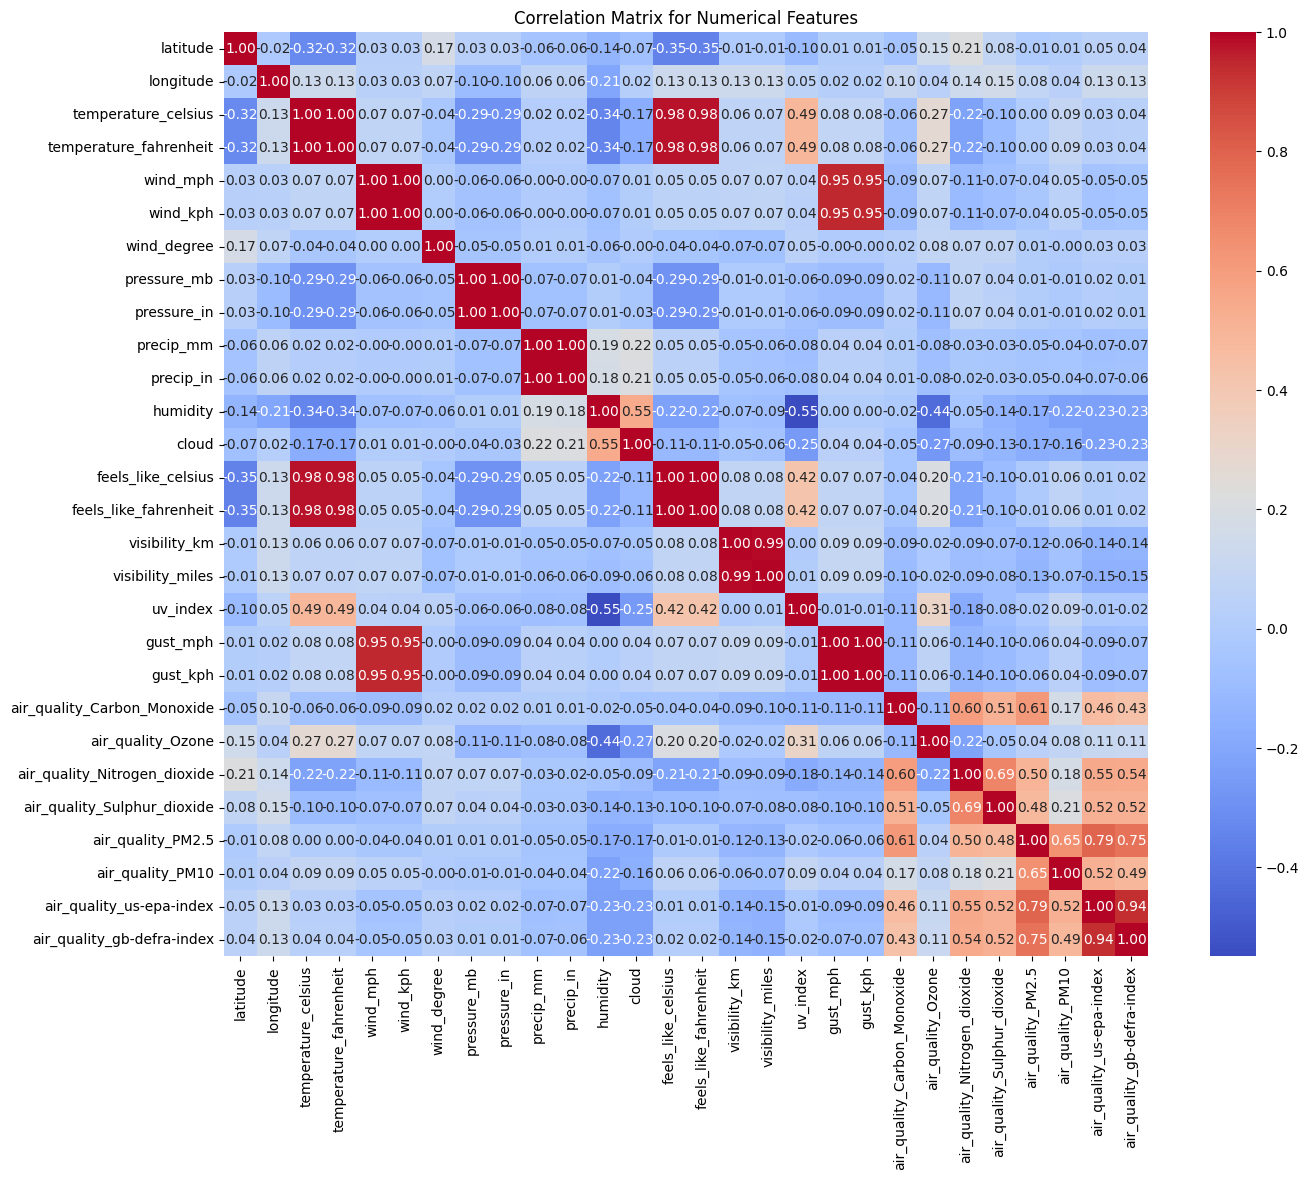

In [10]:
# Plot Correlation Matrix
# ========================

# Create a heatmap to visualize correlation between all numerical features
plt.figure(figsize=(16, 12))
sns.heatmap(
    df.select_dtypes(include=['int64', 'float64']).corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

**Step 5 : Label Engineering**

In [11]:
# Step 5: Label Engineering - Define Target Labels
# ================================================

# Function to assign 'Extreme' or 'Normal' based on weather thresholds
def label_extreme_harder(row):
    score = 0

    # Check if each weather condition exceeds threshold and add to score
    if row['temperature_celsius'] > 32 or row['temperature_celsius'] < 0:
        score += 1
    if row['air_quality_PM2.5'] > 65:
        score += 1
    if row['humidity'] > 85 or row['humidity'] < 25:
        score += 1
    if row['wind_kph'] > 35:
        score += 1
    if row['precip_mm'] > 8:
        score += 1
    if row['air_quality_Carbon_Monoxide'] > 4:
        score += 1

    # Label as 'Extreme' if 3 or more conditions are met, else 'Normal'
    return 'Extreme' if score >= 3 else 'Normal'

# Apply labeling function to the DataFrame
df['weather_extreme'] = df.apply(label_extreme_harder, axis=1)

# Display the distribution of labels
df['weather_extreme'].value_counts()

,count
weather_extreme,
Normal,74769
Extreme,6681


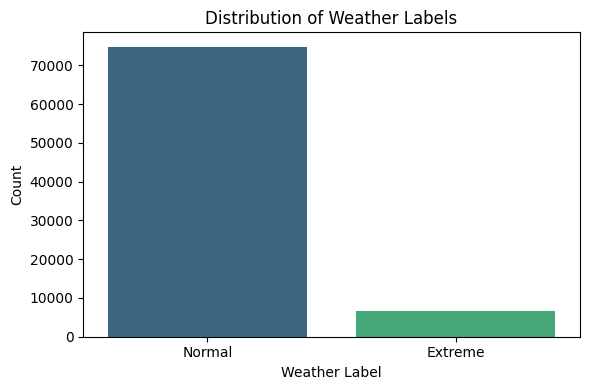

In [12]:
# Plot the distribution of 'weather_extreme' labels using a count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='weather_extreme', palette='viridis')
plt.title("Distribution of Weather Labels")
plt.xlabel("Weather Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Step 6 : Feature Engineering + Noise**

In [13]:
# Step 6: Feature Engineering + Noise
# ====================================

np.random.seed(42)  # Ensure reproducibility of random values

# 1. Add Gaussian noise to selected numeric features to simulate sensor variation
for col in ['humidity', 'wind_kph', 'precip_mm']:
    std_dev = df[col].std()
    noise = np.random.normal(loc=0.0, scale=0.2 * std_dev, size=len(df))  # Apply stronger noise (20% of std)
    df[col] += noise  # Add noise to the original data

# 2. Create interaction-based noisy features to increase complexity
df['humidity_temp_ratio'] = df['humidity'] / (df['temperature_celsius'] + 1)  # Avoid division by zero
df['wind_temp_product'] = df['wind_kph'] * df['temperature_celsius']         # Multiplicative interaction
df['precip_shifted'] = df['precip_mm'] + np.random.normal(0, 0.3, len(df))   # Add more subtle noise

# 3. Add purely random features to act as noise/distractors for the model
df['random_noise_1'] = np.random.normal(0, 1, len(df))        # Gaussian noise (mean=0, std=1)
df['random_noise_2'] = np.random.randint(0, 100, len(df))     # Random integers between 0 and 100


**Step 7 : Resampling (Class Balance)**

In [14]:
# Step 7: Resampling (Class Balance)
# ===================================

# Separate input features and target variable
X = df.drop(columns=['weather_extreme'])
y = df['weather_extreme']

# Combine features and target into one DataFrame for easy resampling
df_combined = pd.concat([X, y], axis=1)

# Split data by class labels
df_normal = df_combined[df_combined['weather_extreme'] == 'Normal']     # Majority class
df_extreme = df_combined[df_combined['weather_extreme'] == 'Extreme']   # Minority class

# Upsample the minority class to match the majority class size
df_extreme_upsampled = resample(
    df_extreme,
    replace=True,                        # Allow duplicates
    n_samples=len(df_normal),           # Match number of Normal samples
    random_state=42                     # Ensure reproducibility
)

# Combine the balanced data
df_balanced = pd.concat([df_normal, df_extreme_upsampled])

# Shuffle the rows to mix Normal and Extreme samples
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new class distribution
print(df_balanced['weather_extreme'].value_counts())

weather_extreme
Extreme    74769
Normal     74769
Name: count, dtype: int64


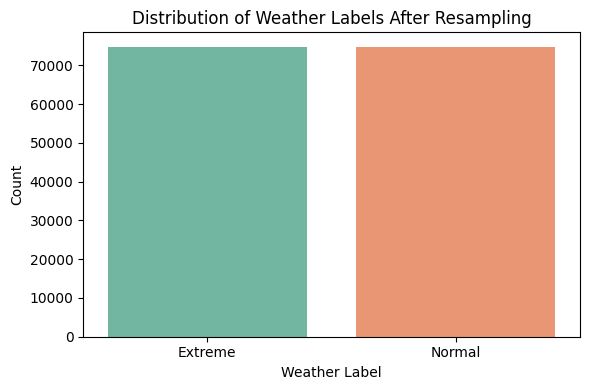

In [15]:
# Create a bar plot to show the distribution of labels in the balanced dataset

plt.figure(figsize=(6, 4))
sns.countplot(data=df_balanced, x='weather_extreme', palette='Set2')
plt.title("Distribution of Weather Labels After Resampling")
plt.xlabel("Weather Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Step 8 : Encoding + Scaling**

In [16]:
# Step 8: Encoding + Scaling
# ============================

# Separate input features and target again from the balanced dataset
X_bal = df_balanced.drop(columns=['weather_extreme'])
y_bal = df_balanced['weather_extreme']

In [17]:
# Drop a highly correlated or redundant feature to reduce model bias
X_bal.drop(columns=['humidity_temp_ratio'], inplace=True)

In [18]:
# Make a copy of the features to perform encoding
X_encoded = X_bal.copy()

# Label encode categorical features (if any) for machine learning compatibility
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])


In [19]:
# Replace infinite values with NaN (to handle any unexpected math operations)
X_encoded = X_encoded.replace([np.inf, -np.inf], np.nan)

# Fill missing values (NaNs) with the mean of each column
for col in X_encoded.columns:
    if X_encoded[col].isnull().any():
        mean_val = X_encoded[col].mean()
        X_encoded[col].fillna(mean_val, inplace=True)

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

**Step 9 : Train/Test Split**

In [20]:
# Step 9: Train/Test Split
# =========================

# Split the dataset into training and testing sets
# - test_size=0.2 means 20% of the data will be used for testing
# - stratify=y_bal ensures the class distribution is preserved in both sets
# - random_state ensures reproducibility of the split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_bal, test_size=0.2, stratify=y_bal, random_state=42
)


**Step 10 : Model Training 1 - Decision Tree Classifier**

In [21]:
# Step 10: Model Training 1 - Decision Tree Classifier
# ====================================================

# Initialize the Decision Tree model with limited depth and split constraints to avoid overfitting
dt_model = DecisionTreeClassifier(
    max_depth=3,            # Maximum depth of the tree
    min_samples_leaf=50,    # Minimum number of samples required at a leaf node
    min_samples_split=80,   # Minimum number of samples required to split an internal node
    random_state=42         # For reproducibility
)

# Train the model using the training data
dt_model.fit(X_train, y_train)

# Predict the class labels on the test set
y_pred_dt = dt_model.predict(X_test)

Evaluation and Validation of Results - Decision Tree


In [22]:
# === Evaluation: Decision Tree ===
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))                        # Print accuracy score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))            # Print confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_dt))  # Detailed precision/recall/f1 report

Decision Tree Performance:
Accuracy: 0.9332954393473318
Confusion Matrix:
 [[13955   999]
 [  996 13958]]
Classification Report:
               precision    recall  f1-score   support

     Extreme       0.93      0.93      0.93     14954
      Normal       0.93      0.93      0.93     14954

    accuracy                           0.93     29908
   macro avg       0.93      0.93      0.93     29908
weighted avg       0.93      0.93      0.93     29908



Graph Visualization - Deision Tree

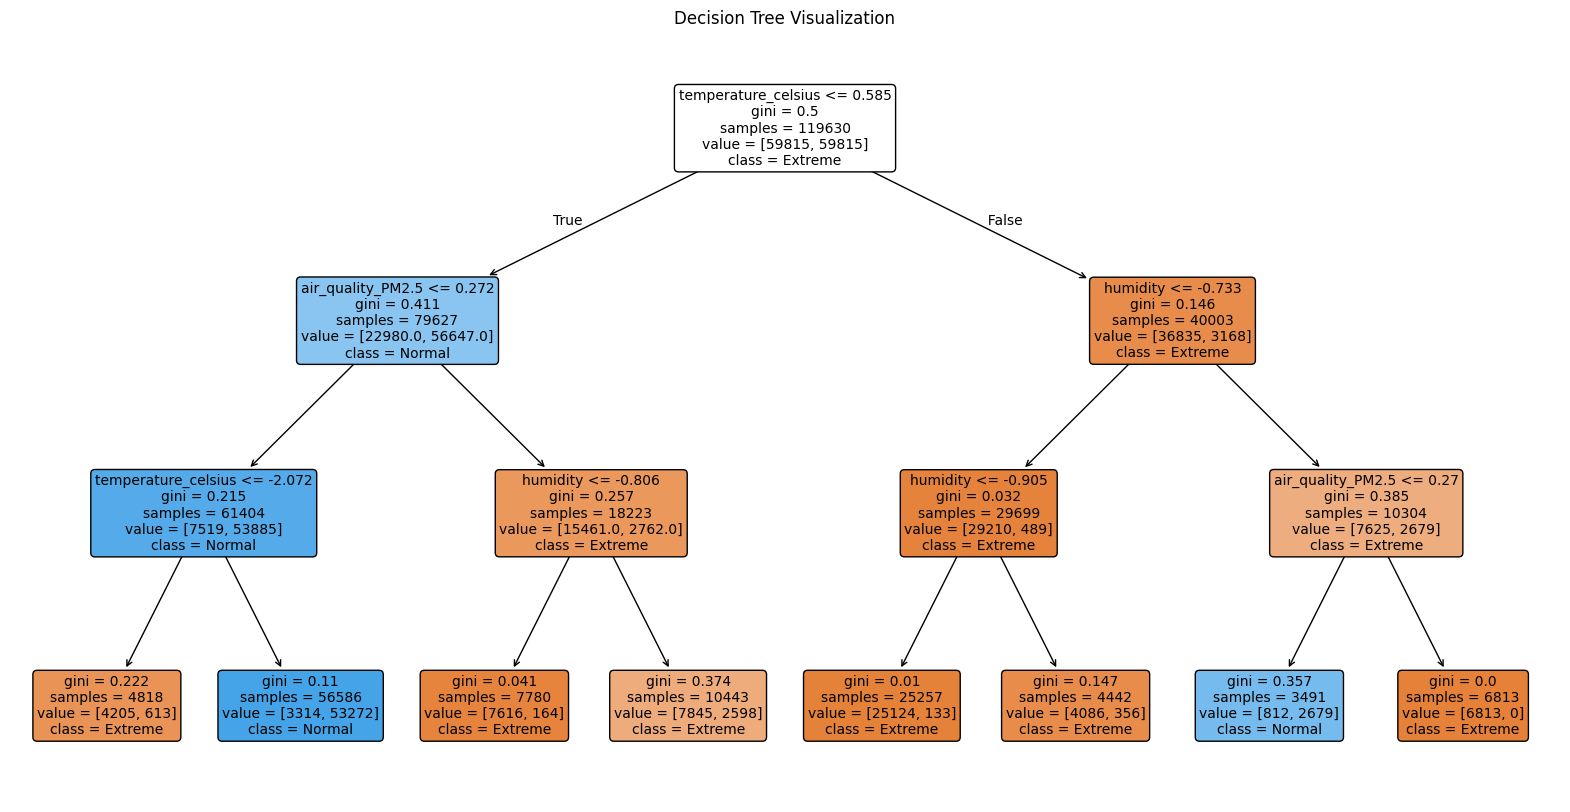

In [23]:
# === Visualization: Decision Tree ===
# Plot the trained decision tree for interpretability
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X_encoded.columns,  # Use feature names for readability
    class_names=dt_model.classes_,    # Display class labels
    filled=True,                      # Fill color to indicate class purity
    rounded=True,                     # Rounded boxes for clarity
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


Confusion Matrix - Decision Tree

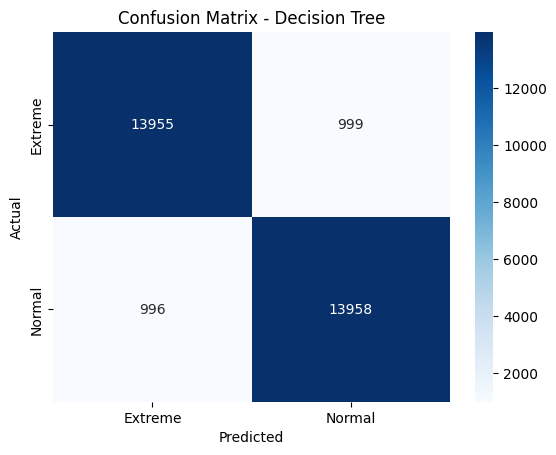

In [24]:
# === Confusion Matrix Heatmap ===
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

ROC Curve - Decision Tree

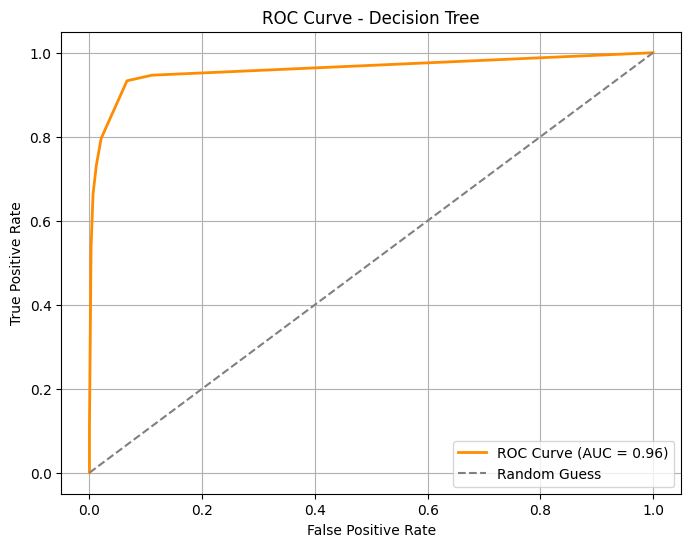

In [25]:
# === ROC Curve and AUC ===
# Get predicted probabilities for the "Extreme" class (index 0)
y_probs = dt_model.predict_proba(X_test)[:, 0]

# Convert string labels to binary format for ROC computation
y_test_binary = label_binarize(y_test, classes=['Normal', 'Extreme']).ravel()

# Calculate ROC curve values and AUC score
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')  # Diagonal line for baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Step 11 : Model Training 2 - Random Forest**

In [26]:
# Step 11: Model Training 2 - Random Forest Classifier
# ====================================================

# Initialize a Random Forest classifier with limited depth and sample constraints
# to reduce overfitting and encourage generalization
rf_model = RandomForestClassifier(
    n_estimators=30,         # Number of trees in the forest
    max_depth=5,             # Limit tree depth
    min_samples_leaf=10,     # Minimum samples required at a leaf node
    min_samples_split=20,    # Minimum samples required to split an internal node
    max_features='sqrt',     # Use square root of features at each split (faster, more diverse trees)
    random_state=42          # Ensures reproducibility
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

Evaluation and Validation of Results - Random Forest

In [27]:
# === Evaluation: Random Forest ===
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))                      # Print accuracy score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))         # Print confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_rf))  # Detailed precision/recall/f1 report


Random Forest Performance:
Accuracy: 0.9523204493780928
Confusion Matrix:
 [[14730   224]
 [ 1202 13752]]
Classification Report:
               precision    recall  f1-score   support

     Extreme       0.92      0.99      0.95     14954
      Normal       0.98      0.92      0.95     14954

    accuracy                           0.95     29908
   macro avg       0.95      0.95      0.95     29908
weighted avg       0.95      0.95      0.95     29908



Confusion Matrix - Random Forest

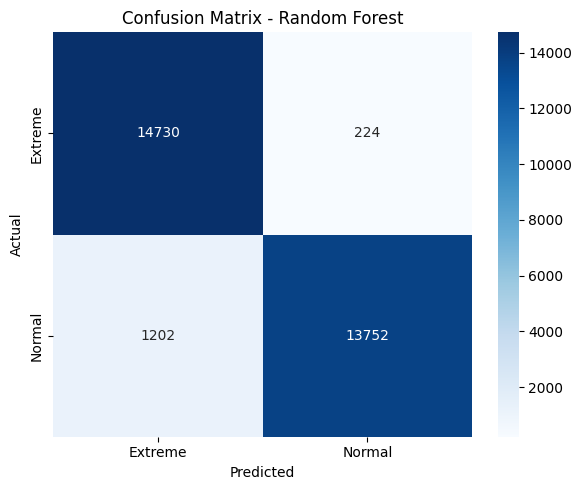

In [28]:
# === Confusion Matrix Heatmap ===
# Visualize confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

ROC Curve - Random Forest

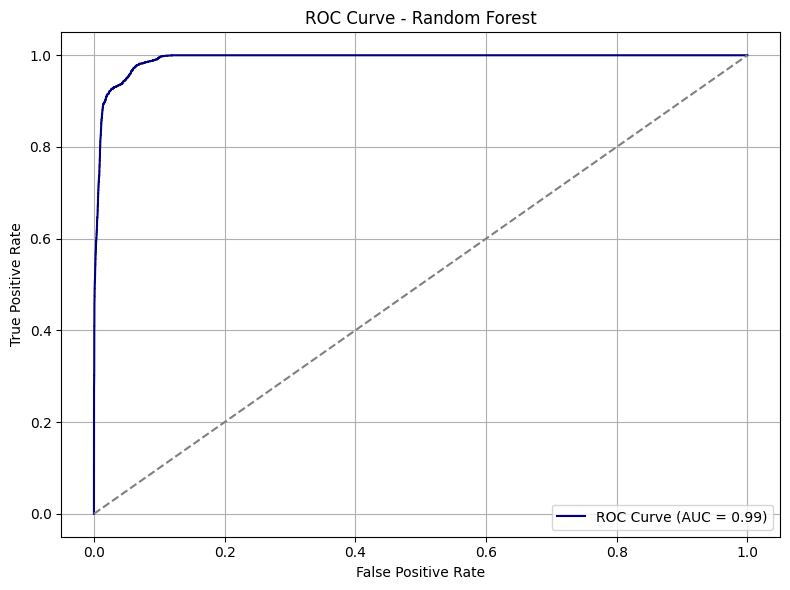

In [29]:
# === ROC Curve and AUC ===
# Get the probability estimates for the "Extreme" class
extreme_index_rf = list(rf_model.classes_).index('Extreme')
y_probs_rf = rf_model.predict_proba(X_test)[:, extreme_index_rf]

# Binarize the class labels for ROC curve calculation
y_test_binary = label_binarize(y_test, classes=['Normal', 'Extreme']).ravel()

# Compute False Positive Rate, True Positive Rate, and thresholds
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"ROC Curve (AUC = {roc_auc_rf:.2f})", color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

Feature Importance - Random Forest

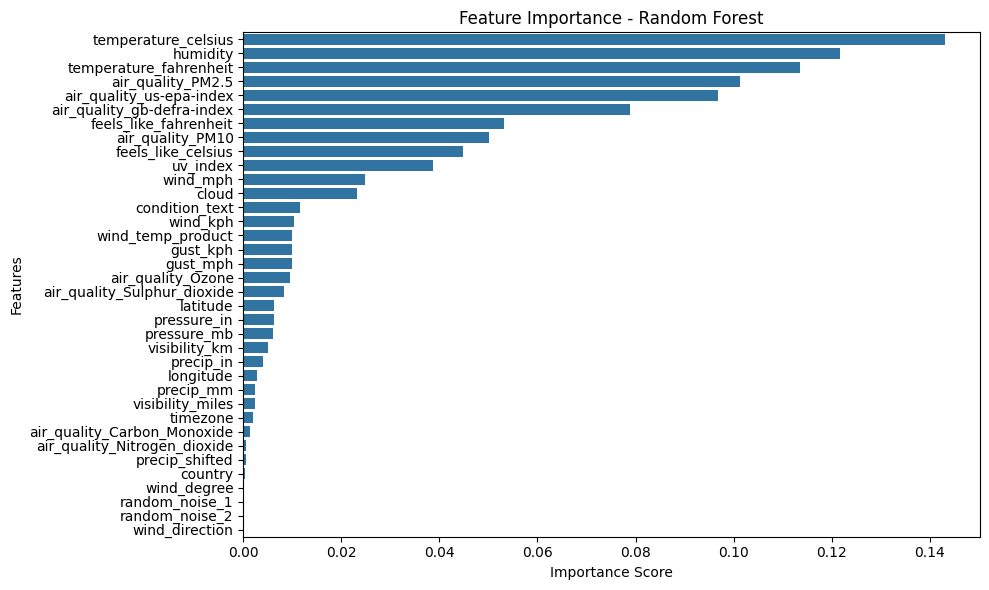

In [30]:
# === Feature Importance Plot ===
# Show which features contributed most to the Random Forest model
importances = rf_model.feature_importances_
feature_names = X_encoded.columns
indices = np.argsort(importances)[::-1]  # Sort features by importance

# Barplot of top features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()